<div style="direction:rtl;text-align:center"><img src="https://mohammadkh.ir/github/logo.png" alt="Mohammadkh.ir" style="width: 250px;"/></div>
<h1><div style="direction:rtl;text-align:center">Reduce Dimensions</div></h1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../__data/manual.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

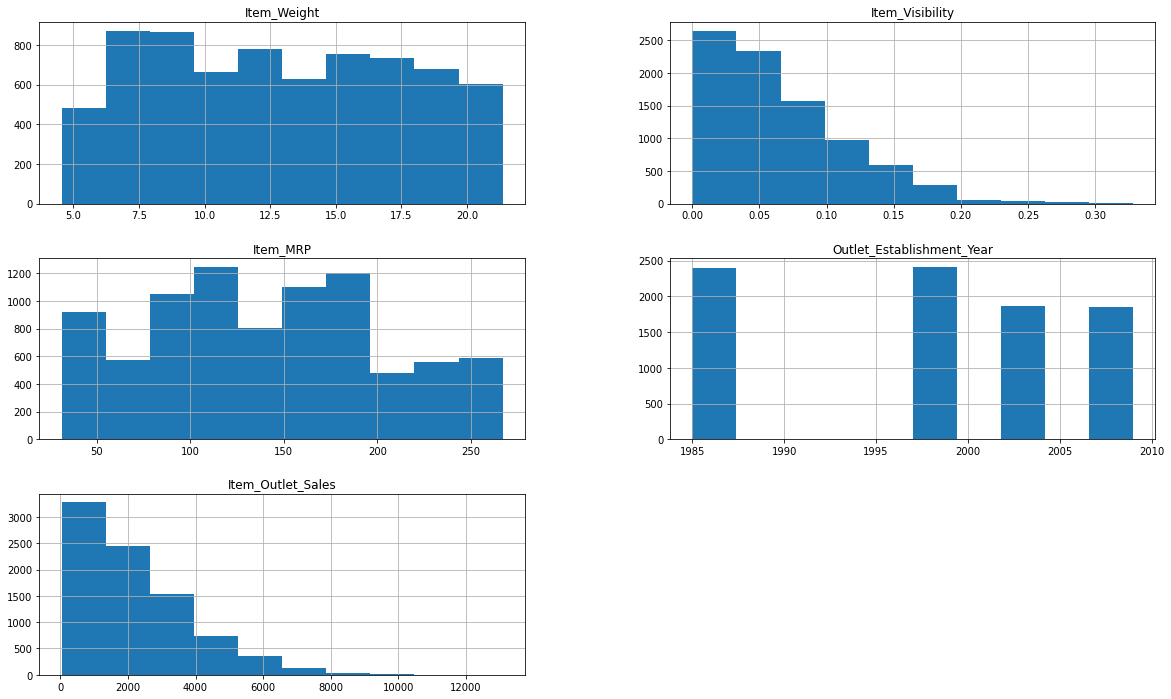

In [3]:
data.hist(figsize=(20, 12))

## miss value

In [4]:
# cal percentage of missing data
null_perc = data.isnull().sum() / len(data) * 100
null_perc

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [5]:
del_percentage_of_missing_data = 10
null_perc = data.isnull().sum() / len(data) * 100
column_name = data.columns
new_columns_names = []
for i in range(0, len(null_perc)):
    if null_perc[i] < del_percentage_of_missing_data:
        new_columns_names.append(column_name[i])
        
data = data[new_columns_names]
data

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


## varians

In [6]:
var_val = data.var().round(2)
var_val

C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_8556/2874323136.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_val = data.var().round(2)


Item_Visibility                    0.00
Item_MRP                        3878.18
Outlet_Establishment_Year         70.09
Item_Outlet_Sales            2912140.94
dtype: float64

In [7]:
names=[]
for i in data.columns:
    try:
        if data[i].var() < 1:
            names.append(i)
    except:
        pass
data.drop(names, axis = 1, inplace = True)
data

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


## skewness (cholegi)

In [8]:
#get log -->inplace or ..under
skewness = data.skew()
skewness

C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_8556/1748957619.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = data.skew()


Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [9]:
names=[]
for i in data.columns:
    try:
        if data[i].skew() > 0.5 or data[i].skew() < -0.5:
            names.append(i)
    except:
        pass
data.drop(names, axis = 1, inplace = True)
data

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2


<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:left"><strong>Reduce Dimensions</strong><br>MohammadReza <strong>Khajedaloi</strong><br><br>
</div>
<div style="direction:rtl;text-align:right">
<a href="http://mohammadkh.ir/">WebSite</a> - <a href="https://github.com/khajedaloi/">GitHub</a> - <a href="https://www.linkedin.com/in/mohammad-kh/">Linkedin</a>
</div>
</div>